In [2]:
import numpy as np
import pandas as pd

## 1. Cargamos los datos

In [3]:
datos = np.load('proyecto_training_data.npy')
df = pd.DataFrame(datos)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [4]:
# Colocamos nombres al dataframe para poder identificar mejor las columnas

df.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [5]:
print("Forma de los datos cargados:", df.shape)

Forma de los datos cargados: (1460, 6)


## 2. Separacion de datos utilizando sclicing

In [6]:
# mezclamos los datos aleatoriamente
np.random.shuffle(datos)

# calculamos el índice para la división
filas = datos.shape[0]
cantidad_entrenamiento = int(0.8 * filas)

# separamos los datos en conjuntos de entrenamiento y validación/pruebas
datos_entrenamiento = datos[:cantidad_entrenamiento]
datos_validacion = datos[cantidad_entrenamiento:]

# Verificar las formas de los conjuntos de datos
print("Forma de datos_entrenamiento:", datos_entrenamiento.shape)
print("Forma de datos_validacion:", datos_validacion.shape)


Forma de datos_entrenamiento: (1168, 6)
Forma de datos_validacion: (292, 6)


# 3. Analisis exploratorio de datos

In [126]:
df_entrenamiento = pd.DataFrame(datos_entrenamiento)
df_entrenamiento.dropna() 

df_entrenamiento

df_validacion = pd.DataFrame(datos_validacion)
df_validacion.dropna() 

df_entrenamiento.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df_validacion.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


df_entrenamiento,df_validacion

(      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
 0       79500.0          5.0     779.0           4.0     1930.0         50.0
 1      159500.0          7.0    1576.0           8.0     1890.0         60.0
 2      140000.0          6.0    1375.0           5.0     1954.0         75.0
 3      257000.0          8.0    1844.0           7.0     2005.0         88.0
 4      245350.0          8.0    1694.0           7.0     2008.0         64.0
 ...         ...          ...       ...           ...        ...          ...
 1163   169900.0          6.0    1034.0           6.0     1976.0          NaN
 1164   149900.0          5.0    1466.0           6.0     1959.0        134.0
 1165   127000.0          5.0     955.0           6.0     1966.0         66.0
 1166   231500.0          7.0     963.0           7.0     2001.0         80.0
 1167   136500.0          5.0    1050.0           6.0     1961.0          NaN
 
 [1168 rows x 6 columns],
      SalePrice  OverallQual  1stFlr

In [13]:
print('Estadistica Descriptiva')
print(df_entrenamiento.describe())

# Calcular el rango peak to peak
rango_peak_to_peak = df_entrenamiento.max() - df_entrenamiento.min()

print("\n")
print("\n")
print("Rango (peak to peak):")
print(rango_peak_to_peak)


Estadistica Descriptiva
                   0            1            2            3            4  \
count    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   179641.196062     6.065925  1162.029966     6.512842  1970.920377   
std     79942.963427     1.378599   390.495669     1.677976    29.941096   
min     37900.000000     1.000000   334.000000     2.000000  1872.000000   
25%    129900.000000     5.000000   883.500000     5.000000  1953.000000   
50%    160500.000000     6.000000  1085.500000     6.000000  1972.000000   
75%    210250.000000     7.000000  1378.000000     7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000    14.000000  2010.000000   

                5  
count  968.000000  
mean    69.840909  
std     24.777636  
min     21.000000  
25%     58.750000  
50%     68.500000  
75%     80.000000  
max    313.000000  




Rango (peak to peak):
0    717100.0
1         9.0
2      4358.0
3        12.0
4       138.0
5       292.0
d

## 4. Para cada variable Graficamos un histograma de la variable

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


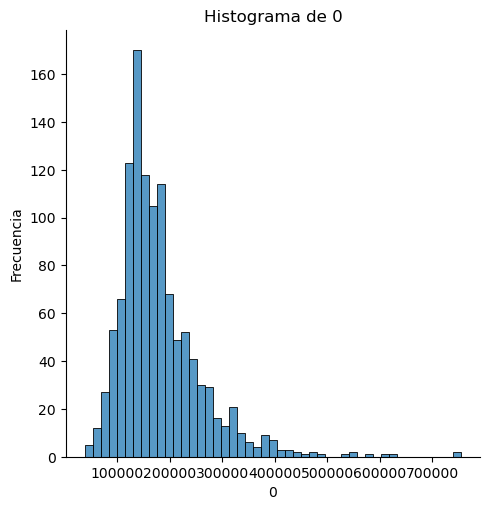

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


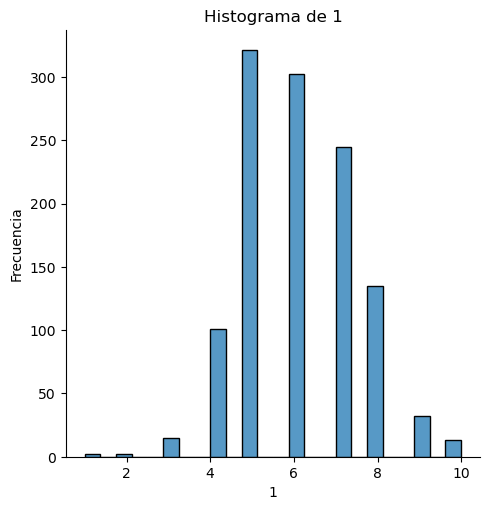

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


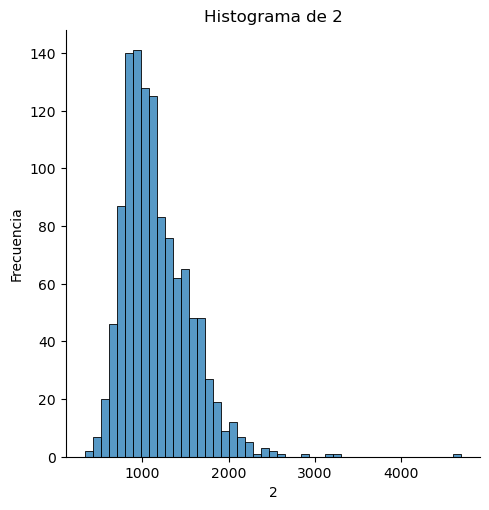

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


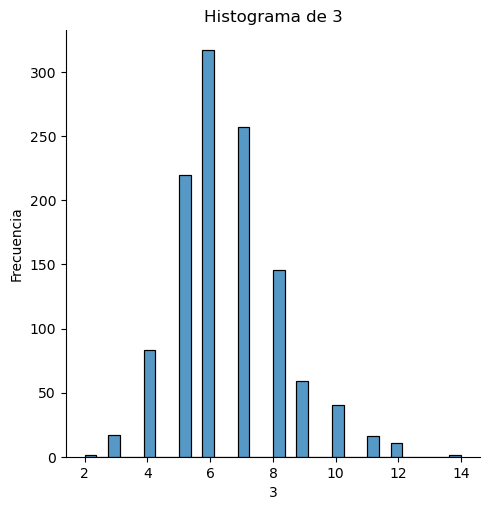

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


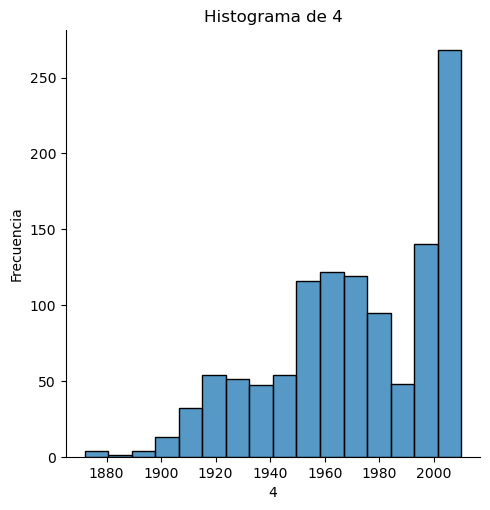

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


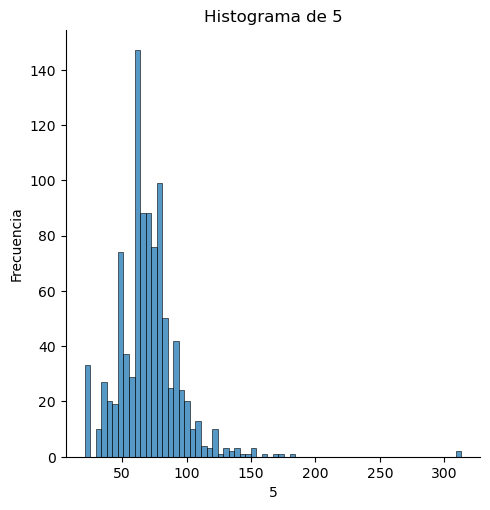

In [125]:
for columna in df_entrenamiento.columns:
    sns.displot(df_entrenamiento[columna], kde=False)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()




## 5. Para cada variable independiente x :

### 5.1 Calcular el coeficiente de correlacion entre x y y

In [15]:
correlacionOverallQual = df_entrenamiento['OverallQual'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'OverallQual' e y = 'SalePrice:", correlacionOverallQual)

correlacion1stFlrSF = df_entrenamiento['1stFlrSF'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = '1stFlrSF' e y = 'SalePrice:", correlacion1stFlrSF)

correlacionTotRmsAbvGrd = df_entrenamiento['TotRmsAbvGrd'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'TotRmsAbvGrd' e y = 'SalePrice:", correlacionTotRmsAbvGrd)

correlacionYearBuilt = df_entrenamiento['YearBuilt'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'YearBuilt' e y = 'SalePrice:", correlacionYearBuilt)

correlacionLotFrontage = df_entrenamiento['LotFrontage'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'LotFrontage' e y = 'SalePrice:", correlacionLotFrontage)

Coeficiente de correlación entre x = 'OverallQual' e y = 'SalePrice: 0.788050554302901
Coeficiente de correlación entre x = '1stFlrSF' e y = 'SalePrice: 0.595019699894875
Coeficiente de correlación entre x = 'TotRmsAbvGrd' e y = 'SalePrice: 0.5341624015989392
Coeficiente de correlación entre x = 'YearBuilt' e y = 'SalePrice: 0.5211252262166859
Coeficiente de correlación entre x = 'LotFrontage' e y = 'SalePrice: 0.3585813296139284


### 5.2 Graficar x vs y(scatterplot) usando matplotlib. 
### 5.3 Colocar el coeficiente de correlacion y colocarlo como parte del tıtulo de la grafica.

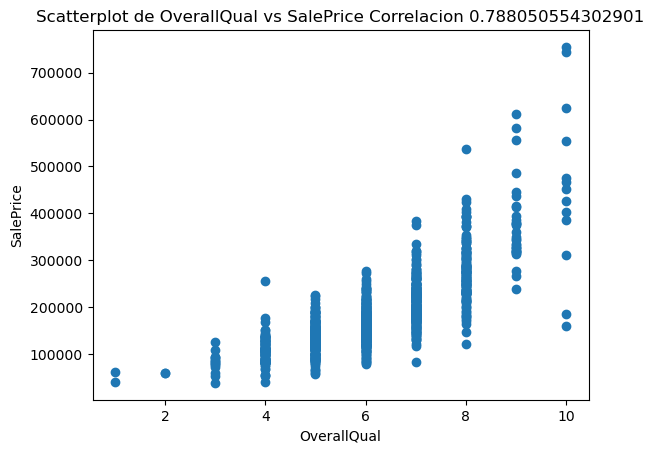

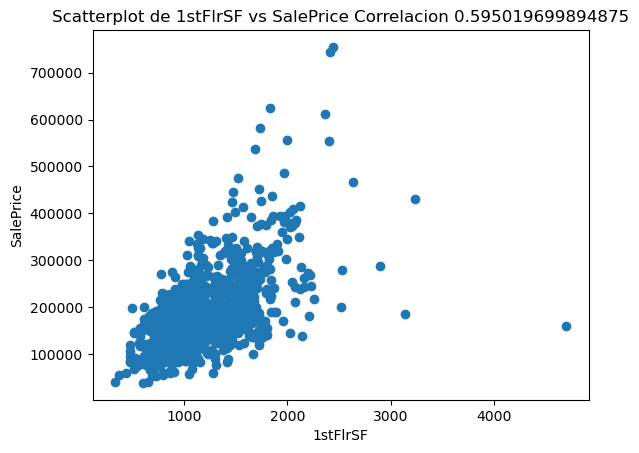

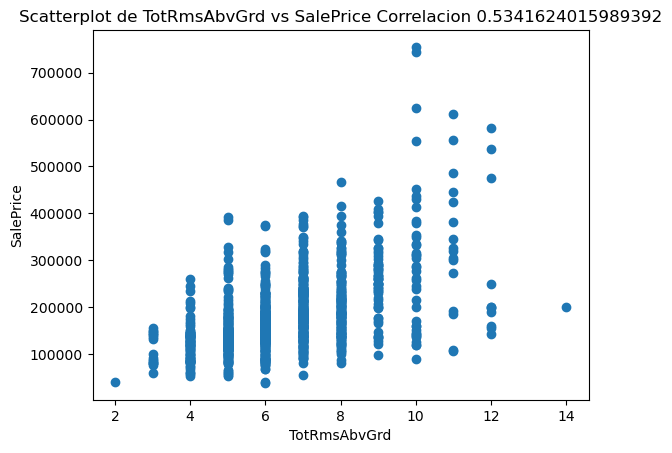

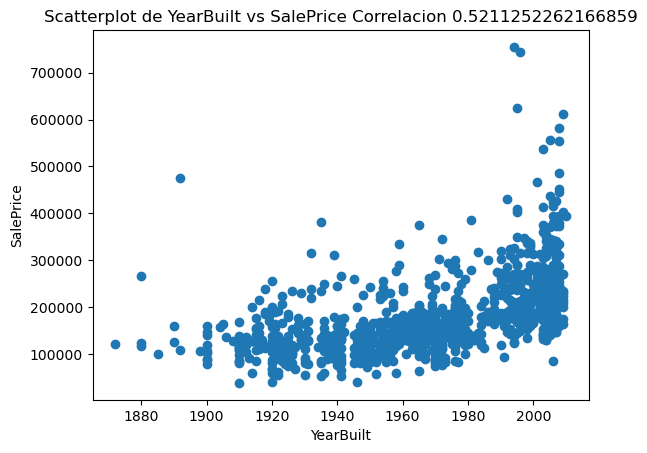

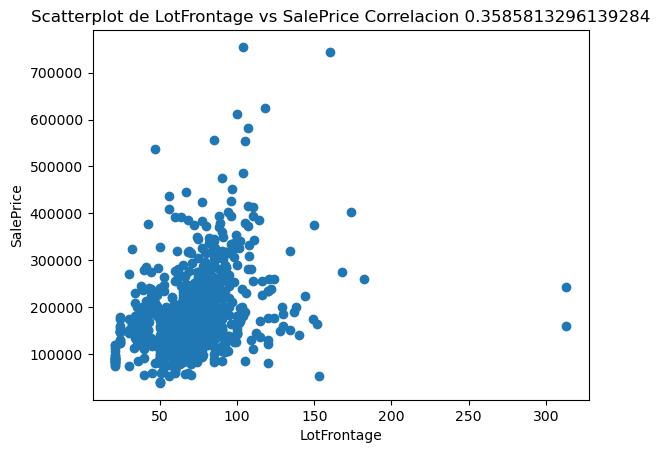

In [16]:
plt.scatter(df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de OverallQual vs SalePrice Correlacion {correlacionOverallQual}')
plt.show()

plt.scatter(df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de 1stFlrSF vs SalePrice Correlacion {correlacion1stFlrSF}')
plt.show()

plt.scatter(df_entrenamiento['TotRmsAbvGrd'], df_entrenamiento['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de TotRmsAbvGrd vs SalePrice Correlacion {correlacionTotRmsAbvGrd}')
plt.show()

plt.scatter(df_entrenamiento['YearBuilt'], df_entrenamiento['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de YearBuilt vs SalePrice Correlacion {correlacionYearBuilt}')
plt.show()

plt.scatter(df_entrenamiento['LotFrontage'], df_entrenamiento['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de LotFrontage vs SalePrice Correlacion {correlacionLotFrontage}')
plt.show()


### 5.4 Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion entre dicha variable y la variable dependiente

Se han escogido las variables **OverallQual** y **1stFlrSF** ya que presentan una mayor correlación entre x, y; siendo estas: **0.7964358126132067** y **0.5997063853756309** respectivamente

## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.

In [50]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Creamos una matriz de 2 columnas, con x en la primera columna y 1 en la segunda columna
    X = np.column_stack((x, np.ones_like(x)))
    
    # Inicializamos los vectores b0 y b1
    beta = np.zeros(2)
    
    # Almacenar el error de cada iteración
    errores = []
    
    # Almacenar el modelo de cada iteración
    modelos = []
    
    # Iterar sobre el número de épocas
    for epoch in range(epochs):
        # Calcular las predicciones del modelo
        y_pred = np.dot(X, beta)
        
        # Calcular el error (suma de los errores al cuadrado)
        error = ((y_pred - y) ** 2).mean()
        
        # Almacenar el error de esta iteración
        errores.append(error)
        
        # Almacenar el modelo de esta iteración
        modelos.append({'Pendiente': beta[0], 'Intercepto': beta[1]})
        
        # Actualizar los parámetros del modelo usando el gradiente descendente
        gradiente = np.dot(X.T, y_pred - y) / len(y)
        beta -= alpha * gradiente
        
        # Imprimir el error cada 'imprimir_error_cada' iteraciones
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración: {epoch}, Error: {error}")
    
    print(f"Pendiente: {beta[0]}, Intercepto: {beta[1]}")
    print()
    print()
    
    # Devolver los parámetros finales del modelo, el vector de errores y la lista de modelos
    return beta, errores, modelos

In [91]:
betaFst, erroresFst, modelsFst = entrenar_regresion_lineal(df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'], epochs=250, imprimir_error_cada=20, alpha=0.00001)
betaSnd, erroresSnd, modelsSnd = entrenar_regresion_lineal(df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'], epochs=20, imprimir_error_cada=2, alpha=0.000001)

Iteración: 0, Error: 38656365082.26456
Iteración: 20, Error: 38094185667.57809
Iteración: 40, Error: 37540852886.101654
Iteración: 60, Error: 36996227521.98837
Iteración: 80, Error: 36460172550.17419
Iteración: 100, Error: 35932553101.902435
Iteración: 120, Error: 35413236430.790985
Iteración: 140, Error: 34902091879.433205
Iteración: 160, Error: 34398990846.524666
Iteración: 180, Error: 33903806754.507103
Iteración: 200, Error: 33416415017.72152
Iteración: 220, Error: 32936693011.062485
Iteración: 240, Error: 32464520039.125763
Pendiente: 2800.7252330843435, Intercepto: 427.060363517319


Iteración: 0, Error: 38656365082.26456
Iteración: 2, Error: 6467090818.324103
Iteración: 4, Error: 4411929047.950209
Iteración: 6, Error: 4280714794.69386
Iteración: 8, Error: 4272337211.9853396
Iteración: 10, Error: 4271802279.607492
Iteración: 12, Error: 4271768070.376383
Iteración: 14, Error: 4271765830.3979225
Iteración: 16, Error: 4271765631.5336623
Iteración: 18, Error: 4271765562.9867377
Pendi

In [61]:
betaFst, betaSnd

(array([2800.72523308,  427.06036352]), array([151.2683974 ,   0.88936494]))

### Funcion Para visualizar curva de aprendizaje

In [62]:
def visualizar_curva_aprendizaje(errores):
    plt.plot(range(len(errores)), errores, marker='o', linestyle='-')
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Número de Iteración')
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()


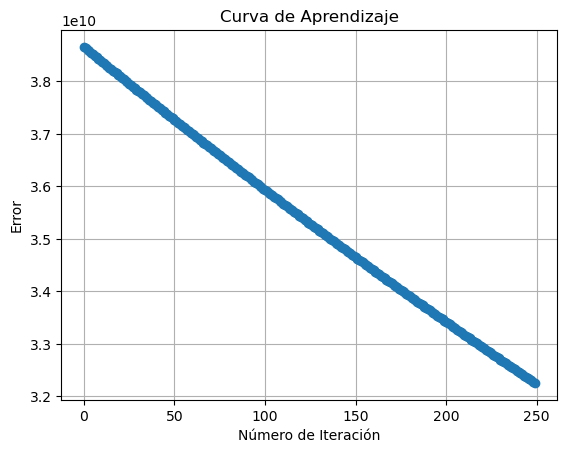

In [258]:
visualizar_curva_aprendizaje(erroresFst)

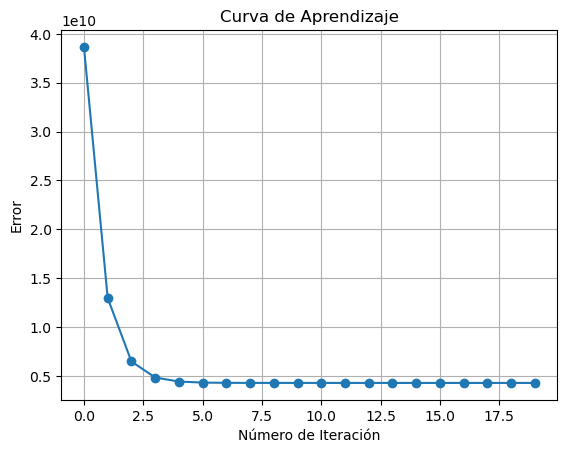

In [92]:
visualizar_curva_aprendizaje(erroresSnd)

### Funcion para graficar evolucion del Modelo

In [156]:
def visualizar_evolucion_modelo(modelos, x, y, n):
    for i in range(0, len(modelos), n):
        beta = modelos[i]
        plt.scatter(x, y, color='blue', label='Datos de Entrenamiento')
        plt.plot(x, beta['Pendiente']*x + beta['Intercepto'], color='red', label=f'Iteración {i}')
        plt.title('Evolución del Modelo Entrenado')
        plt.xlabel('Variable Independiente')
        plt.ylabel('Variable Dependiente')
        plt.legend()
        plt.grid(True)
        plt.show()
        


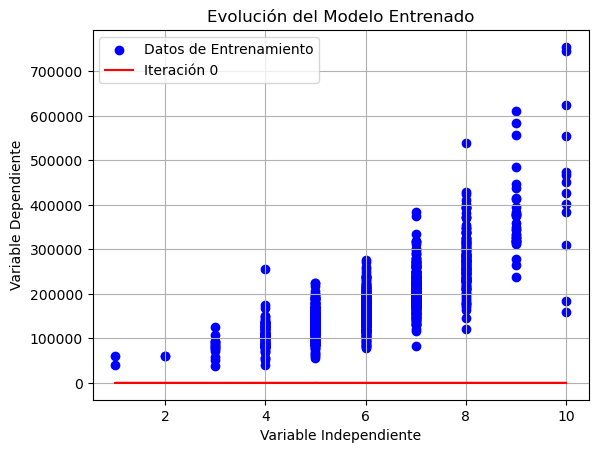

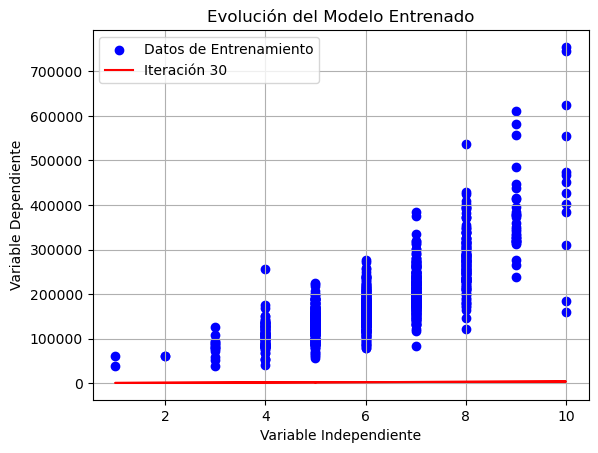

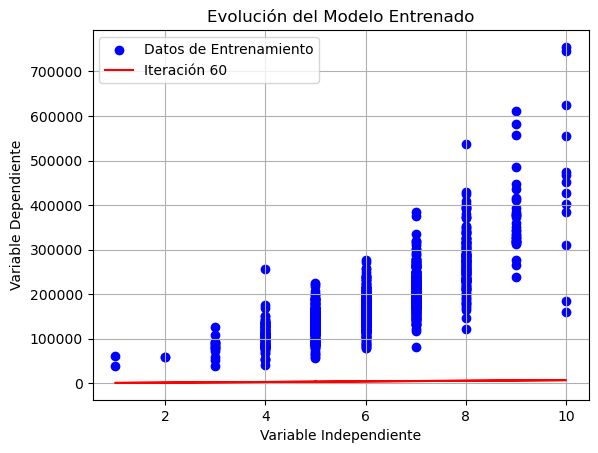

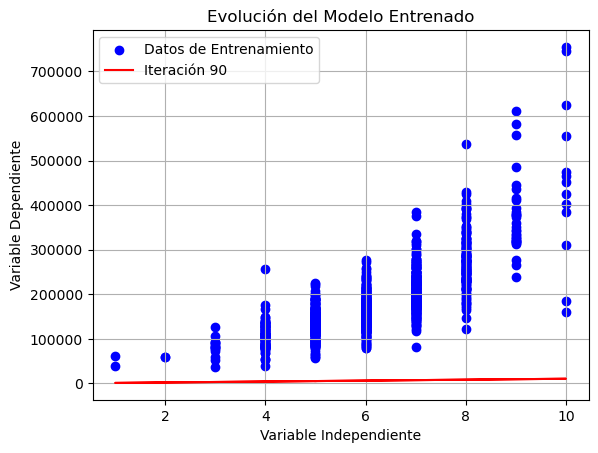

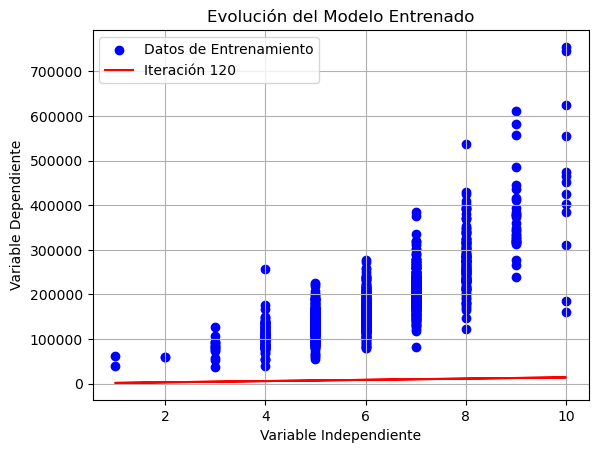

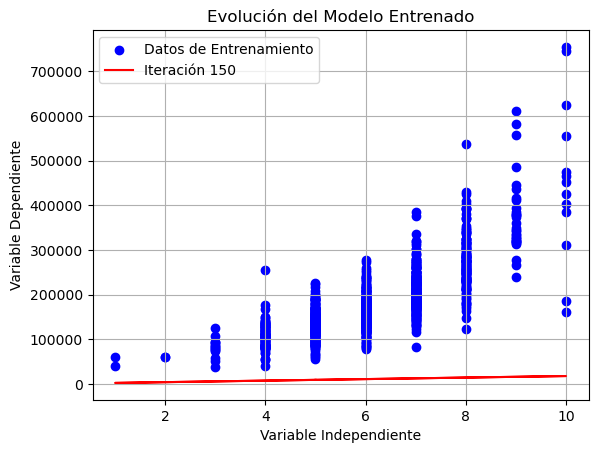

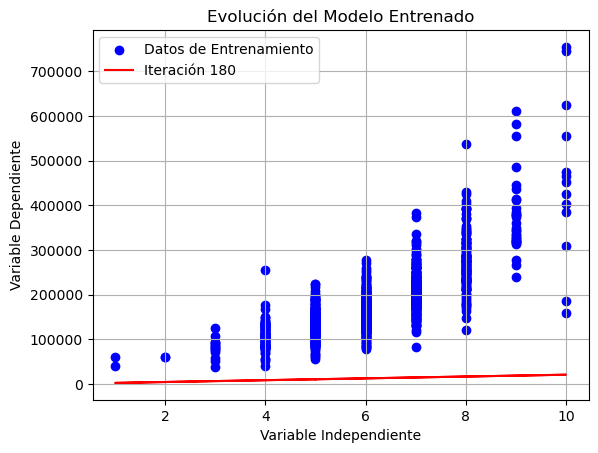

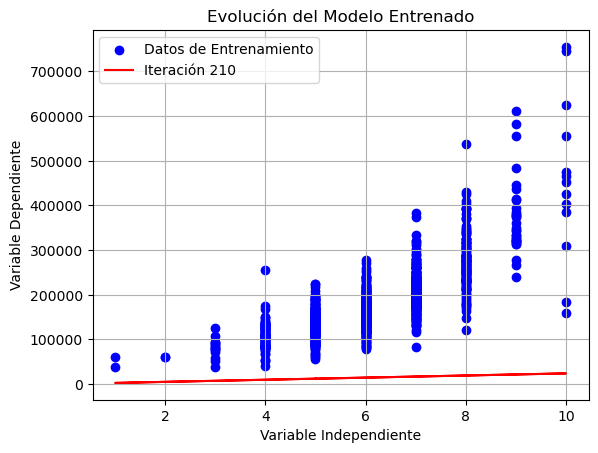

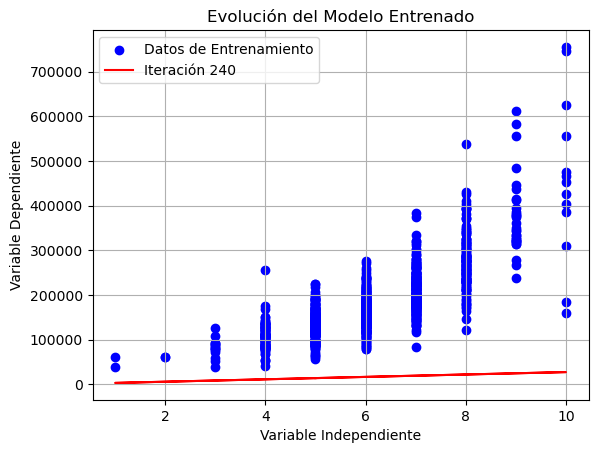

In [157]:
visualizar_evolucion_modelo(modelsFst,df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'], n=30)




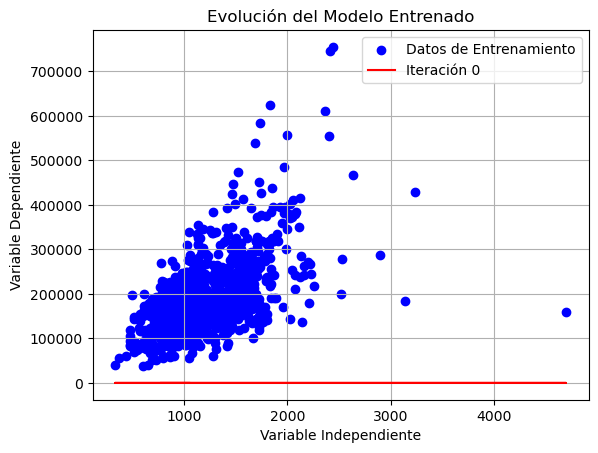

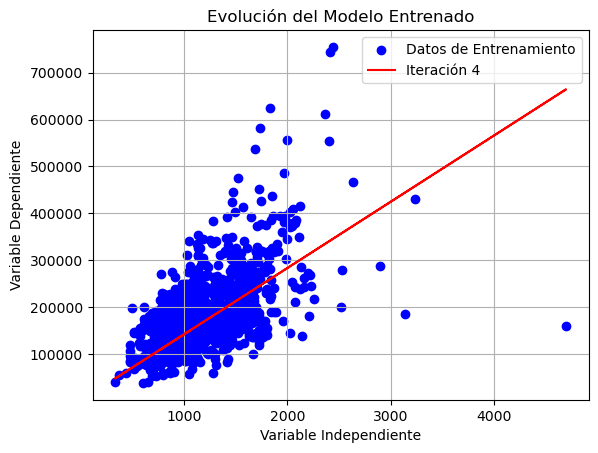

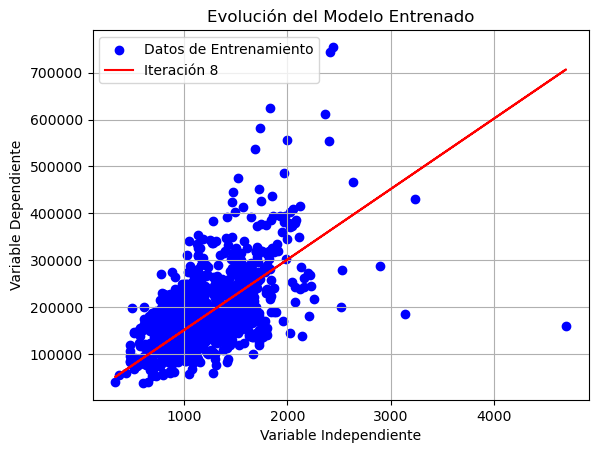

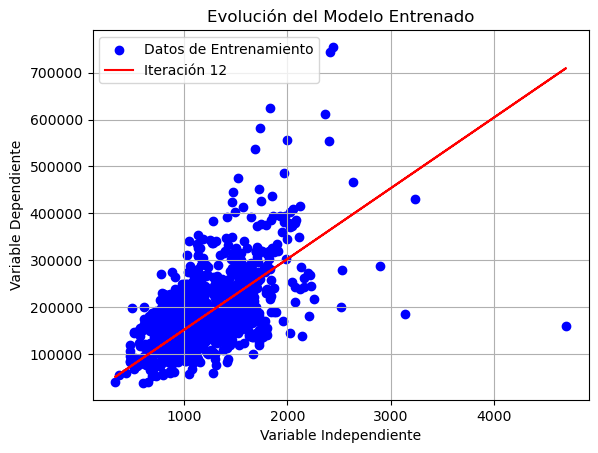

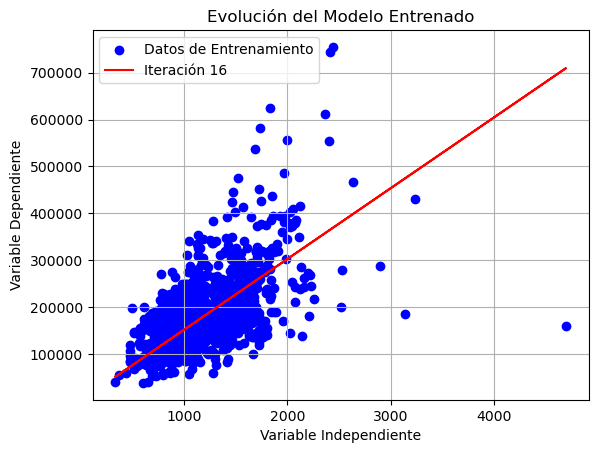

In [99]:
visualizar_evolucion_modelo(modelsSnd,df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'], n=4)

## Funcion para modelso Scikit_Learn

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def entrenar_modelo_scikit_learn(x_train, y_train):
    x_train_array = x_train.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(x_train_array, y_train)
    return model


In [259]:
modelo_scikit_one = entrenar_modelo_scikit_learn(df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'])
modelo_scikit_one.coef_[0], modelo_scikit_one.intercept_

(45697.92065924599, -97558.94766332005)

In [263]:
modelo_scikit_two = entrenar_modelo_scikit_learn(df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'])
modelo_scikit_two.coef_[0], modelo_scikit_two.intercept_

(121.81348460560245, 38090.27671709028)

In [113]:
def hacer_predicciones_combinadas(modelos_manuales, modelo_scikit_learn, x):
    x_array = x.values.reshape(-1, 1)
    pred_manual = np.zeros_like(x_array)
    for modelo in modelos_manuales:
        pred_manual += modelo['Pendiente'] * x_array + modelo['Intercepto']
    pred_manual /= len(modelos_manuales)
    pred_scikit = modelo_scikit_learn.predict(x_array)
    pred_combinada = (pred_manual + pred_scikit) / 2
    return pred_manual, pred_scikit, pred_combinada


In [261]:
pred_manual, pred_scikit, pred_combinada = hacer_predicciones_combinadas(modelsFst, modelo_scikit_one, df_entrenamiento['OverallQual'])
pred_manual, pred_scikit, pred_combinada 

(array([[ 7305.69864371],
        [10141.45631256],
        [ 8723.57747813],
        ...,
        [ 7305.69864371],
        [10141.45631256],
        [ 7305.69864371]]),
 array([130930.65563291, 222326.4969514 , 176628.57629216, ...,
        130930.65563291, 222326.4969514 , 130930.65563291]),
 array([[ 69118.17713831, 114816.09779755,  91967.13746793, ...,
          69118.17713831, 114816.09779755,  69118.17713831],
        [ 70536.05597273, 116233.97663198,  93385.01630236, ...,
          70536.05597273, 116233.97663198,  70536.05597273],
        [ 69827.11655552, 115525.03721477,  92676.07688514, ...,
          69827.11655552, 115525.03721477,  69827.11655552],
        ...,
        [ 69118.17713831, 114816.09779755,  91967.13746793, ...,
          69118.17713831, 114816.09779755,  69118.17713831],
        [ 70536.05597273, 116233.97663198,  93385.01630236, ...,
          70536.05597273, 116233.97663198,  70536.05597273],
        [ 69118.17713831, 114816.09779755,  91967.13746793, .

In [264]:
pred_manual2, pred_scikit2, pred_combinada2 = hacer_predicciones_combinadas(modelsSnd, modelo_scikit_two, df_entrenamiento['1stFlrSF'])
pred_manual, pred_scikit, pred_combinada 

(array([[ 7305.69864371],
        [10141.45631256],
        [ 8723.57747813],
        ...,
        [ 7305.69864371],
        [10141.45631256],
        [ 7305.69864371]]),
 array([130930.65563291, 222326.4969514 , 176628.57629216, ...,
        130930.65563291, 222326.4969514 , 130930.65563291]),
 array([[ 69118.17713831, 114816.09779755,  91967.13746793, ...,
          69118.17713831, 114816.09779755,  69118.17713831],
        [ 70536.05597273, 116233.97663198,  93385.01630236, ...,
          70536.05597273, 116233.97663198,  70536.05597273],
        [ 69827.11655552, 115525.03721477,  92676.07688514, ...,
          69827.11655552, 115525.03721477,  69827.11655552],
        ...,
        [ 69118.17713831, 114816.09779755,  91967.13746793, ...,
          69118.17713831, 114816.09779755,  69118.17713831],
        [ 70536.05597273, 116233.97663198,  93385.01630236, ...,
          70536.05597273, 116233.97663198,  70536.05597273],
        [ 69118.17713831, 114816.09779755,  91967.13746793, .

In [244]:
def calcular_error(modelo, x_val, y_val):
    if isinstance(modelo, np.ndarray):
        # Modelo entrenado manualmente
        beta_0, beta_1 = modelo
        pred = beta_0 * x_val + beta_1
    else:
        # Modelo de scikit-learn
        pred = modelo.predict(x_val.values.reshape(-1, 1))
        
    error = mean_squared_error(y_val, pred)
    
    return error



In [254]:
def graficar_errores_modelos(x, y, modelo_manual, modelo_sklearn, x_val, y_val):
    errores_manual = []
    errores_sklearn = []

    # Calcular error del modelo entrenado manualmente
    error_manual = calcular_error(modelo_manual, x_val, y_val)
    errores_manual.append(error_manual)
    
    # Calcular error del modelo de scikit-learn
    error_sklearn = calcular_error(modelo_sklearn, x_val, y_val)
    errores_sklearn.append(error_sklearn)

    # Graficar los errores
    plt.figure(figsize=(6, 4))
    plt.bar(['Manual', 'Scikit-learn'], [error_manual, error_sklearn], color=['b', 'r'], alpha=0.5)
    plt.xlabel('Modelos')
    plt.ylabel('Error Cuadrático Medio')
    plt.title('Errores de Modelos')
    plt.show()

In [247]:
# Calcular error para el modelo de scikit-learn
error_scikit = calcular_error(modelo_scikit_one, df_validacion[['OverallQual']], df_validacion['SalePrice'])
error_manual = calcular_error(betaFst, df_validacion[['OverallQual']], df_validacion['SalePrice'])

error_scikit, error_manual

(2227744948.6228185, 35592086857.032196)

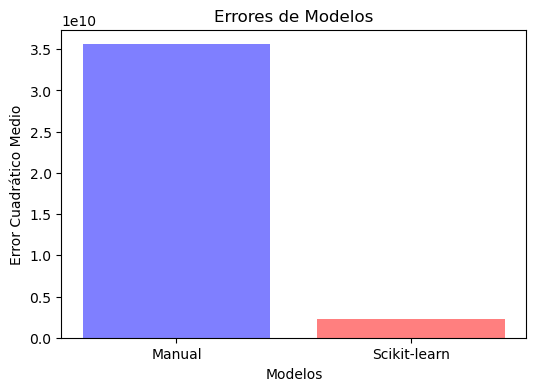

In [256]:
graficar_errores_modelos(df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'], betaFst, modelo_scikit_one, df_validacion['OverallQual'], df_validacion['SalePrice'])

In [267]:
# Calcular error para el modelo de scikit-learn
error_scikit = calcular_error(modelo_scikit_two, df_validacion[['1stFlrSF']], df_validacion['SalePrice'])
error_manual = calcular_error(betaSnd, df_validacion[['1stFlrSF']], df_validacion['SalePrice'])

error_scikit, error_manual

(3774788251.1950507, 3734285854.279883)

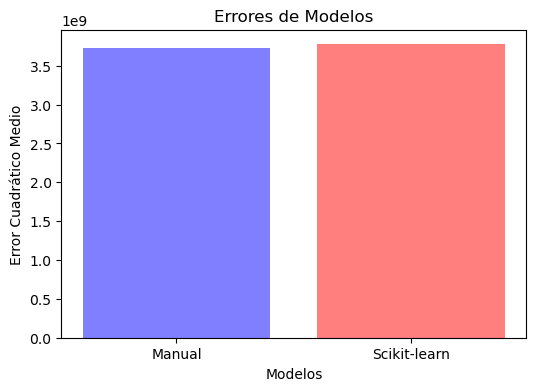

In [268]:
graficar_errores_modelos(df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'], betaSnd, modelo_scikit_two, df_validacion['1stFlrSF'], df_validacion['SalePrice'])

# R1: el modelo scikit Learn tiene una mayor ventaja en el primer caso, en el segundo hay una diferencia muy minima